In [1]:
using JLD2, CairoMakie, GLMakie
using Jchemo, JchemoData
CairoMakie.activate!()

In [2]:
path_jdat = dirname(dirname(pathof(JchemoData)))
db = joinpath(path_jdat, "data/octane.jld2")
@load db dat
pnames(dat)

(:X,)

In [3]:
X = dat.X
n = nro(X)

39

In [4]:
@head X

... (39, 226)
 


Row,1102,1104,1106,1108,1110,1112,1114,1116,1118,1120,1122,1124,1126,1128,1130,1132,1134,1136,1138,1140,1142,1144,1146,1148,1150,1152,1154,1156,1158,1160,1162,1164,1166,1168,1170,1172,1174,1176,1178,1180,1182,1184,1186,1188,1190,1192,1194,1196,1198,1200,1202,1204,1206,1208,1210,1212,1214,1216,1218,1220,1222,1224,1226,1228,1230,1232,1234,1236,1238,1240,1242,1244,1246,1248,1250,1252,1254,1256,1258,1260,1262,1264,1266,1268,1270,1272,1274,1276,1278,1280,1282,1284,1286,1288,1290,1292,1294,1296,1298,1300,⋯
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,⋯
1,-0.0018345,-0.0014965,-0.0010088,-0.00036036,0.00046595,0.0015021,0.0027976,0.0044103,0.0063971,0.0088836,0.012004,0.015891,0.020733,0.026784,0.034374,0.043856,0.055588,0.069878,0.086741,0.10588,0.12665,0.14807,0.16894,0.18778,0.20312,0.21369,0.21878,0.2186,0.2144,0.20829,0.20277,0.20002,0.20144,0.20734,0.21724,0.2303,0.24567,0.26298,0.28249,0.3052,0.33261,0.366,0.40563,0.44983,0.49455,0.53397,0.5619,0.5739,0.5686,0.54818,0.5175,0.48246,0.44825,0.418,0.3926,0.37116,0.35196,0.33331,0.31404,0.29376,0.27268,0.25126,0.23003,0.20943,0.18979,0.17129,0.15407,0.13823,0.12391,0.11125,0.10031,0.091067,0.083432,0.077162,0.071953,0.067472,0.063429,0.059587,0.055793,0.052011,0.048262,0.044595,0.041061,0.037689,0.034484,0.031463,0.028655,0.026111,0.023884,0.022014,0.020532,0.019431,0.018679,0.018222,0.017984,0.017887,0.017855,0.017835,0.017801,0.017743,⋯
2,-0.001627,-0.0012608,-0.00074818,-6.5377e-5,0.00081759,0.0019427,0.0033538,0.0050884,0.00717,0.0096858,0.012741,0.016465,0.021067,0.026836,0.034134,0.043324,0.054735,0.06862,0.084941,0.10337,0.12328,0.14376,0.16369,0.18171,0.19649,0.20688,0.21226,0.21287,0.20994,0.20545,0.20174,0.20078,0.2038,0.21098,0.22178,0.23533,0.25081,0.26788,0.28685,0.3088,0.33529,0.36771,0.40648,0.45007,0.49461,0.53439,0.56324,0.57662,0.57297,0.55421,0.52495,0.49094,0.45728,0.42713,0.40141,0.37937,0.35935,0.33972,0.31937,0.29797,0.27577,0.25332,0.23124,0.21004,0.19006,0.17147,0.15435,0.13872,0.12462,0.11213,0.10128,0.092008,0.084236,0.077742,0.072268,0.067531,0.063288,0.059326,0.055495,0.051738,0.04805,0.044457,0.040996,0.037687,0.034532,0.031536,0.028725,0.026156,0.023886,0.021976,0.020465,0.019348,0.018592,0.018129,0.017872,0.017736,0.017649,0.017565,0.017471,0.017362,⋯
3,-0.00046487,-0.00033003,0.00018072,0.0011213,0.0024647,0.0041399,0.0060749,0.008238,0.010632,0.013356,0.016542,0.020346,0.025009,0.030852,0.038275,0.047695,0.059514,0.074053,0.09131,0.11091,0.1321,0.15376,0.17458,0.19305,0.20776,0.21756,0.22187,0.22101,0.21631,0.2099,0.20433,0.20176,0.20357,0.21,0.22047,0.23399,0.24961,0.26687,0.28603,0.30811,0.33465,0.36699,0.4055,0.44861,0.49241,0.53123,0.55901,0.57128,0.56659,0.54694,0.51705,0.48274,0.44921,0.41959,0.39473,0.37366,0.35454,0.3356,0.31568,0.29448,0.27235,0.24987,0.22772,0.20644,0.18642,0.16791,0.15103,0.13586,0.1224,0.11064,0.10048,0.09178,0.084376,0.078046,0.072577,0.067752,0.063384,0.059306,0.055412,0.051697,0.048207,0.044991,0.042065,0.039377,0.036827,0.034329,0.031847,0.029429,0.027156,0.025119,0.023379,0.021943,0.020793,0.019905,0.019271,0.018911,0.018822,0.018969,0.019273,0.019625,⋯


In [5]:
wl = names(X)
wl_num = parse.(Float64, wl)

226-element Vector{Float64}:
 1102.0
 1104.0
 1106.0
 1108.0
 1110.0
 1112.0
 1114.0
 1116.0
 1118.0
 1120.0
    ⋮
 1536.0
 1538.0
 1540.0
 1542.0
 1544.0
 1546.0
 1548.0
 1550.0
 1552.0

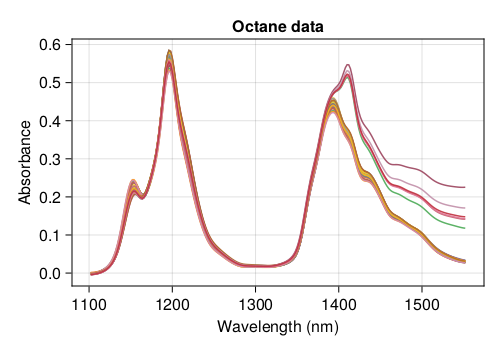

In [6]:
# Six of the samples of the dataset contain
# added alcohol  (= 25, 26, and 36-39)
plotsp(X, wl_num;
    xlabel ="Wavelength (nm)", ylabel = "Absorbance",
    title = "Octane data").f

In [7]:
# Model fitting
fm = pcasvd(X; nlv = 6) ;
# For robust PCA:
#fm = pcasph(X; nlv = 6) ;
pnames(fm)

(:T, :P, :sv, :xmeans, :xscales, :weights, :niter)

In [8]:
# Score distance (SD)
res = occsd(fm) ;
pnames(res)

(:d, :fm, :Sinv, :e_cdf, :cutoff, :nlv)

In [9]:
d = res.d

Row,d,dstand,pval,gh
,Float64,Float64,Float64,Float64
1,2.09516,0.479019,0.538462,0.731616
2,1.36684,0.312503,0.923077,0.311377
3,2.65561,0.607154,0.307692,1.17537
4,1.76936,0.40453,0.769231,0.521772
5,1.42829,0.326552,0.846154,0.340002
6,2.78897,0.637645,0.205128,1.29639
7,2.00096,0.457482,0.615385,0.667308
8,2.04246,0.46697,0.589744,0.695275
9,1.82913,0.418196,0.717949,0.557619


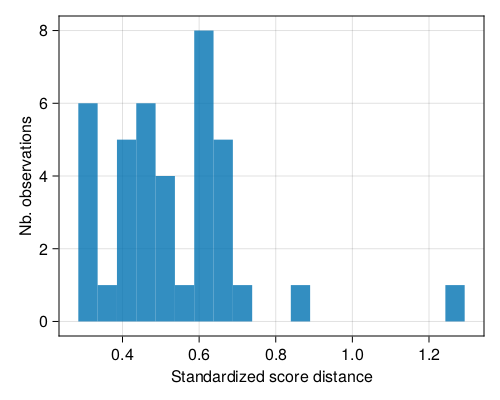

In [10]:
f = Figure(resolution = (500, 400))
Axis(f[1, 1]; xlabel = "Standardized score distance",
    ylabel = "Nb. observations")
hist!(d.dstand; bins = 20)
f

In [11]:
# Orthogonal distance (OD)
res = occod(fm, X) ;
pnames(res)

(:d, :fm, :e_cdf, :cutoff, :nlv)

In [12]:
d = res.d

Row,d,dstand,pval
,Float64,Float64,Float64
1,0.00428182,0.256255,0.820513
2,0.00829593,0.496489,0.410256
3,0.0169662,1.01538,0.0
4,0.00840665,0.503115,0.358974
5,0.0108795,0.65111,0.102564
6,0.00719981,0.430889,0.589744
7,0.0164864,0.986664,0.025641
8,0.0081667,0.488755,0.487179
9,0.0103366,0.618619,0.153846


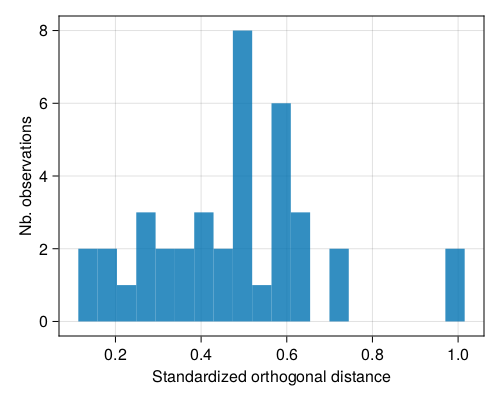

In [13]:
f = Figure(resolution = (500, 400))
Axis(f[1, 1]; xlabel = "Standardized orthogonal distance",
    ylabel = "Nb. observations")
hist!(d.dstand; bins = 20)
f

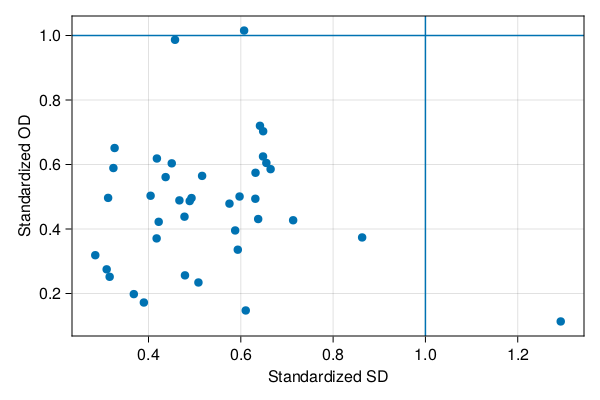

In [14]:
# SD-OD
sd = occsd(fm).d
od = occod(fm, X).d
f, ax = plotxy(sd.dstand, od.dstand;
    xlabel = "Standardized SD", ylabel = "Standardized OD")
hlines!(ax, 1)
vlines!(ax, 1)
f

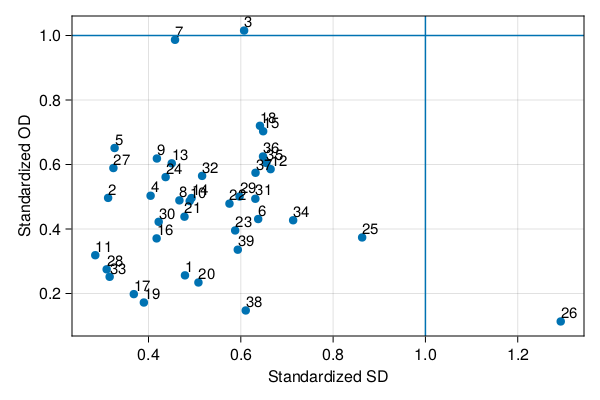

In [15]:
CairoMakie.activate!()
#GLMakie.activate!()
sd = occsd(fm).d
od = occod(fm, X).d
f, ax = plotxy(sd.dstand, od.dstand;
    xlabel = "Standardized SD", ylabel = "Standardized OD")
text!(ax, sd.dstand, od.dstand; text = string.(1:n),
    fontsize = 15)
hlines!(ax, 1)
vlines!(ax, 1)
f

In [16]:
# Direct computation of a composite SD-OD
res = occsdod(fm, X) ;
pnames(res)

(:d, :fm_sd, :fm_od)

In [17]:
d = res.d

Row,d_sd,dstand_sd,pval_sd,gh_sd,d_od,dstand_od,pval_od,dstand
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,2.09516,0.479019,0.538462,0.731616,0.00428182,0.256255,0.820513,0.350358
2,1.36684,0.312503,0.923077,0.311377,0.00829593,0.496489,0.410256,0.393896
3,2.65561,0.607154,0.307692,1.17537,0.0169662,1.01538,0.0,0.785171
4,1.76936,0.40453,0.769231,0.521772,0.00840665,0.503115,0.358974,0.451138
5,1.42829,0.326552,0.846154,0.340002,0.0108795,0.65111,0.102564,0.461109
6,2.78897,0.637645,0.205128,1.29639,0.00719981,0.430889,0.589744,0.52417
7,2.00096,0.457482,0.615385,0.667308,0.0164864,0.986664,0.025641,0.671849
8,2.04246,0.46697,0.589744,0.695275,0.0081667,0.488755,0.487179,0.477738
9,1.82913,0.418196,0.717949,0.557619,0.0103366,0.618619,0.153846,0.508629


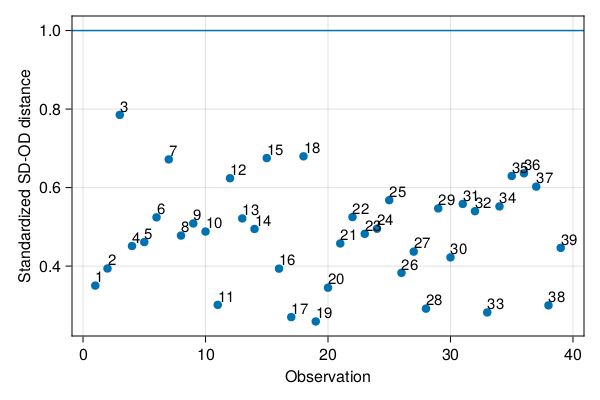

In [18]:
f, ax = plotxy(1:n, d.dstand;
    xlabel = "Observation",
    ylabel = "Standardized SD-OD distance")
text!(ax, 1:n, d.dstand; text = string.(1:n),
    fontsize = 15)
hlines!(ax, 1)
f

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*